<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.797392,67.482029,37.268161,33.856564,-0.073392,169.330755,169.412600,-0.081845
1,0.0,1.0,59.509339,27.480307,76.833155,67.480009,0.122672,241.425481,241.296286,0.129195
2,0.0,2.0,86.238106,98.478170,22.961889,81.681520,0.085414,299.445100,299.362875,0.082225
3,0.0,3.0,49.367431,42.488097,82.838932,30.242623,-0.060419,214.876664,214.938971,-0.062307
4,0.0,4.0,62.916773,35.844011,23.590221,54.579555,-0.144953,186.785608,186.922423,-0.136816
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.527444,63.325129,32.675267,83.008633,-0.151564,231.384909,231.547822,-0.162913
249996,999.0,246.0,28.468882,31.532664,94.645414,47.165690,0.053276,211.865926,211.843366,0.022560
249997,999.0,247.0,37.348660,53.051144,22.176211,98.666991,0.135328,221.378334,221.260901,0.117433
249998,999.0,248.0,63.800973,45.576877,40.068127,90.060612,0.034973,249.541562,249.512909,0.028653


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.797392,67.482029,37.268161,33.856564,-0.073392,169.330755,169.412600,-0.081845
1,0.0,1.0,59.509339,27.480307,76.833155,67.480009,0.122672,241.425481,241.296286,0.129195
2,0.0,2.0,86.238106,98.478170,22.961889,81.681520,0.085414,299.445100,299.362875,0.082225
3,0.0,3.0,49.367431,42.488097,82.838932,30.242623,-0.060419,214.876664,214.938971,-0.062307
4,0.0,4.0,62.916773,35.844011,23.590221,54.579555,-0.144953,186.785608,186.922423,-0.136816
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.527444,63.325129,32.675267,83.008633,-0.151564,231.384909,231.547822,-0.162913
249996,999.0,246.0,28.468882,31.532664,94.645414,47.165690,0.053276,211.865926,211.843366,0.022560
249997,999.0,247.0,37.348660,53.051144,22.176211,98.666991,0.135328,221.378334,221.260901,0.117433
249998,999.0,248.0,63.800973,45.576877,40.068127,90.060612,0.034973,249.541562,249.512909,0.028653


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.797392  67.482029  37.268161  33.856564 -0.073392  169.330755   
      1.0    59.509339  27.480307  76.833155  67.480009  0.122672  241.425481   
      2.0    86.238106  98.478170  22.961889  81.681520  0.085414  299.445100   
      3.0    49.367431  42.488097  82.838932  30.242623 -0.060419  214.876664   
      4.0    62.916773  35.844011  23.590221  54.579555 -0.144953  186.785608   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.527444  63.325129  32.675267  83.008633 -0.151564  231.384909   
      246.0  28.468882  31.532664  94.645414  47.165690  0.053276  211.865926   
      247.0  37.348660  53.051144  22.176211  98.666991  0.135328  221.378334   
      248.0  63.800973  45.576877  40.068127  90.060612  0.034973  249.541562   
      249.0  70.408869  88.940062  94.877844  39.283097 -0.021394  303.488478   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.412600 -0.081845  
      1.0    241.296286  0.129195  
      2.0    299.362875  0.082225  
      3.0    214.938971 -0.062307  
      4.0    186.922423 -0.136816  
...                 ...       ...  
999.0 245.0  231.547822 -0.162913  
      246.0  211.843366  0.022560  
      247.0  221.260901  0.117433  
      248.0  249.512909  0.028653  
      249.0  303.505496 -0.017017  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.797392  67.482029  37.268161  33.856564 -0.073392  169.330755   
      1.0    59.509339  27.480307  76.833155  67.480009  0.122672  241.425481   
      2.0    86.238106  98.478170  22.961889  81.681520  0.085414  299.445100   
      3.0    49.367431  42.488097  82.838932  30.242623 -0.060419  214.876664   
      4.0    62.916773  35.844011  23.590221  54.579555 -0.144953  186.785608   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.527444  63.325129  32.675267  83.008633 -0.151564  231.384909   
      246.0  28.468882  31.532664  94.645414  47.165690  0.053276  211.865926   
      247.0  37.348660  53.051144  22.176211  98.666991  0.135328  221.378334   
      248.0  63.800973  45.576877  40.068127  90.060612  0.034973  249.541562   
      249.0  70.408869  88.940062  94.877844  39.283097 -0.021394  303.488478   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.412600 -0.081845  
      1.0    241.296286  0.129195  
      2.0    299.362875  0.082225  
      3.0    214.938971 -0.062307  
      4.0    186.922423 -0.136816  
...                 ...       ...  
999.0 245.0  231.547822 -0.162913  
      246.0  211.843366  0.022560  
      247.0  221.260901  0.117433  
      248.0  249.512909  0.028653  
      249.0  303.505496 -0.017017  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.797392,67.482029,37.268161,33.856564,-0.073392,169.330755,169.412600,-0.081845
1,0.0,1.0,59.509339,27.480307,76.833155,67.480009,0.122672,241.425481,241.296286,0.129195
2,0.0,2.0,86.238106,98.478170,22.961889,81.681520,0.085414,299.445100,299.362875,0.082225
3,0.0,3.0,49.367431,42.488097,82.838932,30.242623,-0.060419,214.876664,214.938971,-0.062307
4,0.0,4.0,62.916773,35.844011,23.590221,54.579555,-0.144953,186.785608,186.922423,-0.136816
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.527444,63.325129,32.675267,83.008633,-0.151564,231.384909,231.547822,-0.162913
249996,999.0,246.0,28.468882,31.532664,94.645414,47.165690,0.053276,211.865926,211.843366,0.022560
249997,999.0,247.0,37.348660,53.051144,22.176211,98.666991,0.135328,221.378334,221.260901,0.117433
249998,999.0,248.0,63.800973,45.576877,40.068127,90.060612,0.034973,249.541562,249.512909,0.028653


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.797392  67.482029  37.268161  33.856564 -0.073392  169.330755   
      1.0    59.509339  27.480307  76.833155  67.480009  0.122672  241.425481   
      2.0    86.238106  98.478170  22.961889  81.681520  0.085414  299.445100   
      3.0    49.367431  42.488097  82.838932  30.242623 -0.060419  214.876664   
      4.0    62.916773  35.844011  23.590221  54.579555 -0.144953  186.785608   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.527444  63.325129  32.675267  83.008633 -0.151564  231.384909   
      246.0  28.468882  31.532664  94.645414  47.165690  0.053276  211.865926   
      247.0  37.348660  53.051144  22.176211  98.666991  0.135328  221.378334   
      248.0  63.800973  45.576877  40.068127  90.060612  0.034973  249.541562   
      249.0  70.408869  88.940062  94.877844  39.283097 -0.021394  303.488478   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    169.412600 -0.081845  
      1.0    241.296286  0.129195  
      2.0    299.362875  0.082225  
      3.0    214.938971 -0.062307  
      4.0    186.922423 -0.136816  
...                 ...       ...  
999.0 245.0  231.547822 -0.162913  
      246.0  211.843366  0.022560  
      247.0  221.260901  0.117433  
      248.0  249.512909  0.028653  
      249.0  303.505496 -0.017017  

[250000 rows x 8 columns]

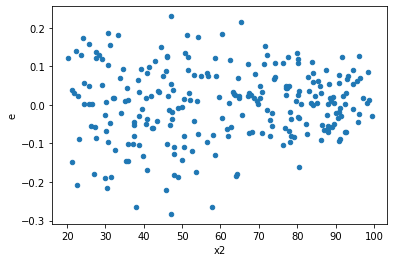

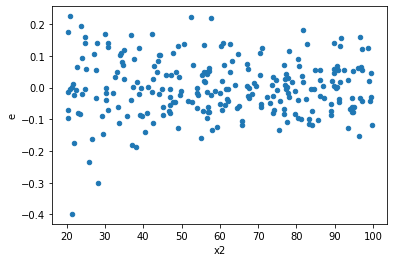

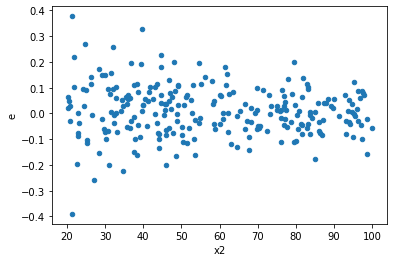

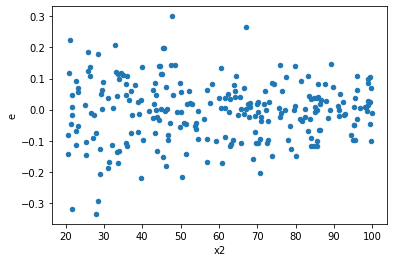

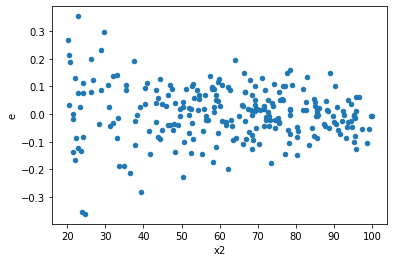

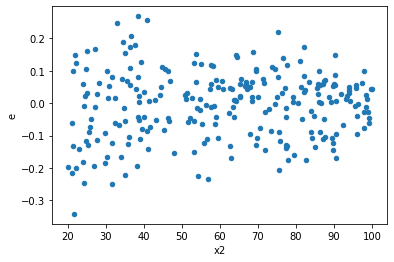

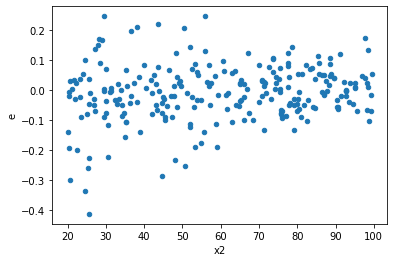

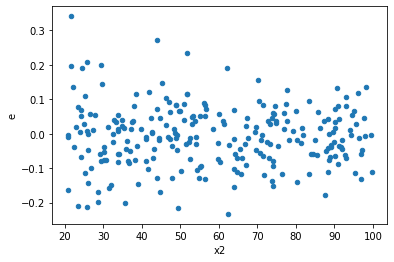

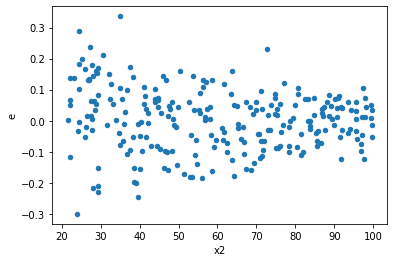

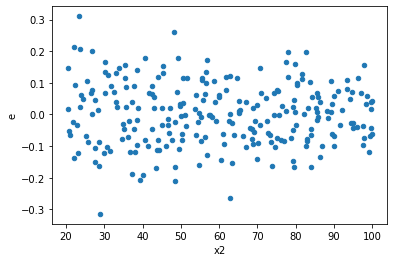

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
8.0,96.0,96.0,0.8569421110783276,0.9447840244217081,0.00892648032373258,0.009841500254392793,1.1025062395788265,0.633551468170277,0.6832242659148615,0.3167757340851385,Reject001=1 : Homoscedasticity
106.0,96.0,96.0,0.8932604312037542,0.8959632052755558,0.009304796158372439,0.009332950054953706,1.0030257402851253,0.9882219250131821,0.505889037493409,0.49411096250659103,Reject001=1 : Homoscedasticity
151.0,96.0,96.0,0.7603426693744446,0.8465804651805302,0.007920236139317131,0.008818546512297189,1.113419645220011,0.5996997744793953,0.7001501127603024,0.29984988723969763,Reject001=1 : Homoscedasticity
234.0,96.0,96.0,0.8928078126619828,0.9011195708572846,0.009300081381895654,0.009386662196430048,1.0093096835370645,0.9638850746848209,0.5180574626575896,0.48194253734241044,Reject001=1 : Homoscedasticity
235.0,96.0,96.0,0.9030673081953567,1.0321535299289832,0.009406951127034966,0.010751599270093575,1.1429419718355054,0.5140225626360129,0.7429887186819936,0.25701128131800643,Reject001=1 : Homoscedasticity
375.0,96.0,96.0,0.9278531122675276,0.9906857496052704,0.009665136586120079,0.0103196432250549,1.06771830207498,0.7488644298792413,0.6255677850603794,0.37443221493962064,Reject001=1 : Homoscedasticity
405.0,96.0,96.0,0.7463778904834325,0.7987588555312936,0.007774769692535755,0.008320404745117641,1.070180220657305,0.7403517709045615,0.6298241145477192,0.37017588545228075,Reject001=1 : Homoscedasticity
599.0,96.0,96.0,0.9019167186047657,0.9632891605321346,0.009394965818799643,0.010034262088876403,1.0680466839802127,0.7477260316233683,0.6261369841883159,0.37386301581168413,Reject001=1 : Homoscedasticity
694.0,96.0,96.0,0.7277007791250012,0.80191304212501,0.007580216449218763,0.008353260855468855,1.1019818380423376,0.6352069805850382,0.6823965097074809,0.3176034902925191,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,1.1458261471774391,0.581241651658593,0.011935689033098324,0.006054600538110344,0.507268622810179,0.0010183235552457587,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,0.9642616694816409,0.6495780449933222,0.01004439239043376,0.006766437968680439,0.6736532888863211,0.05434788813082675,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,1.161478375684965,0.8196200778329494,0.012098733080051717,0.008537709144093223,0.7056696835613409,0.08929851045054552,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,1.1467763590345623,0.6609566809580578,0.01194558707327669,0.006884965426646436,0.5763605743621172,0.007456853322955247,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,1.3365767987712174,0.43565354151957597,0.01392267498720018,0.00453805772416225,0.3259472571423463,9.099625452782925e-08,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,1.2421200087551256,0.8156422528084701,0.012938750091199226,0.008496273466754897,0.6566533403047915,0.04059263069953539,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,1.0052678980424625,0.5804633755191471,0.010471540604608984,0.006046493494991115,0.5774215775212472,0.0076554465149849295,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,0.931806290539131,0.5437406349607553,0.009706315526449282,0.005663964947507868,0.5835339817744244,0.00888699619587501,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,0.8569421110783276,0.9447840244217081,0.00892648032373258,0.009841500254392793,1.1025062395788265,0.633551468170277,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      501
Reject001=0 : Heteroscedasticity    499
Name: Result_test, dtype: int64